<div style="text-align: center;">
    <h1 style="color: #a64dff;">Anexo 21</h1>
    <h3>Proyecto 21: Clasificador de Texto con CNN's para NLP</h3>
    <hr/>
    <p style="text-align: right;">Mg. Luis Felipe Bustamante Narváez</p>
</div>

En este proyecto, diseñaremos un clasificador de texto, utilizando redes neuronales convoucionales, recurso que permite un procesamiento más complejo de los ejercicios anteriores, pero a su vez más preciso y con excelente eficiencia, y mínimo coste computacional.

## Librerías

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import itertools
from keras.models import load_model
from keras.optimizers import RMSprop
import pickle

## Cargamos los Datos

In [3]:
path = 'data/df_total.csv'
df = pd.read_csv(path)

In [4]:
df

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra
...,...,...,...
1212,https://www.bbva.com/es/como-lograr-que-los-in...,En la vida de toda empresa emergente llega un ...,Innovacion
1213,https://www.bbva.com/es/podcast-como-nos-afect...,La espiral alcista de los precios continúa y g...,Macroeconomia
1214,https://www.larepublica.co/redirect/post/3253735,Las grandes derrotas nacionales son experienci...,Alianzas
1215,https://www.bbva.com/es/bbva-y-barcelona-healt...,BBVA ha alcanzado un acuerdo de colaboración c...,Innovacion


## Procesamiento de Datos

### Creamos las categorías

In [5]:
target = df['Type'].astype('category').cat.codes

In [6]:
target

0       3
1       4
2       0
3       2
4       3
       ..
1212    1
1213    2
1214    0
1215    1
1216    0
Length: 1217, dtype: int8

In [7]:
# Adicionamos la columna al df
df['target'] = target

In [8]:
df

,url,news,Type,target
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra,3
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones,4
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas,0
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia,2
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra,3
...,...,...,...,...
1212,https://www.bbva.com/es/como-lograr-que-los-in...,En la vida de toda empresa emergente llega un ...,Innovacion,1
1213,https://www.bbva.com/es/podcast-como-nos-afect...,La espiral alcista de los precios continúa y g...,Macroeconomia,2
1214,https://www.larepublica.co/redirect/post/3253735,Las grandes derrotas nacionales son experienci...,Alianzas,0
1215,https://www.bbva.com/es/bbva-y-barcelona-healt...,BBVA ha alcanzado un acuerdo de colaboración c...,Innovacion,1


### Separamos los conjuntos de Datos

In [9]:
df_train, df_test = train_test_split(df, test_size=0.3)

### Obtenemos el número de clases

In [10]:
K = df['target'].max() + 1
K

7

### Creamos los conjuntos de salida

In [11]:
Y_train = df_train['target']
Y_test = df_test['target']

In [12]:
len(Y_train)

851

In [13]:
len(Y_test)

366

## Tokenización

### Tokenizamos oraciones en Secuencias

In [14]:
#Vocabulario máximo
max_vocab_size = 30000
#Iniciamos el tokenizador
tokenizer = Tokenizer(num_words=max_vocab_size)
#Tokenizamos
tokenizer.fit_on_texts(df_train['news'])
#Creamos las secuencias
secuences_train = tokenizer.texts_to_sequences(df_train['news'])
secuences_test = tokenizer.texts_to_sequences(df_test['news'])

### Diccionario de palabras tokenizadas

In [15]:
# Creamos el diccionario
word2index = tokenizer.word_index
# Calculamos el tamaño del tokenizado
V = len(word2index)
# mostramos
print(f'Se encontraron {V} tokens.')

Se encontraron 26211 tokens.


In [16]:
diez = dict(itertools.islice(word2index.items(), 10))
print(f'Estas son las 10 primeras palabras que más se repiten son:\n{diez}')

Estas son las 10 primeras palabras que más se repiten son:
{'de': 1, 'la': 2, 'en': 3, 'el': 4, 'que': 5, 'y': 6, 'a': 7, 'los': 8, 'las': 9, 'del': 10}


### Rellenamos las Secuencias (padding)

In [17]:
# Rellenar la secuencia de entrenamiento
data_train = pad_sequences(secuences_train)
print(f'Dimensiones del tensor de entrenamiento: {data_train.shape}')
# Longitud de la secuencia de entrenamiento
T = data_train.shape[1]
print(f'Longitud de la secuencia de entrenamiento: {T}')

Dimensiones del tensor de entrenamiento: (851, 3015)
Longitud de la secuencia de entrenamiento: 3015


In [18]:
# Rellenar la secuencia de prueba
data_test = pad_sequences(secuences_test, maxlen=T)
print(f'Dimensiones del tensor de prueba: {data_test.shape}')
# Longitud de la secuencia de prueba
print(f'Longitud de la secuencia de prueba: {data_test.shape[1]}')

Dimensiones del tensor de prueba: (366, 3015)
Longitud de la secuencia de prueba: 3015


## Embedding y Modelo

### Dimensiones del Embedding

In [19]:
# A modo de prueba
D = 50

### Construcción del Modelo

In [20]:
# Capa de entrada
i = Input(shape=(T,))
# Capa de embedding
x = Embedding(V + 1, D)(i) #+1 para el token especial de palabras desconocidas padding
# Capa de convolución
x = Conv1D(32, 3, activation='relu')(x)  # 32 filtros por cada 3 palabras
# Capa de pooling
x = GlobalMaxPooling1D()(x)

# Otras capas que podemos aplicar según lo visto
#x = MaxPooling1D(3)(x)
#x = Conv1D(64, 3, activation='relu')(x)
#x = MaxPooling1D(3)(x)
#x = Conv1D(128, 3, activation='relu')(x)

# Capa Densa
x = Dense(K)(x)

# Creación del modelo
modelo = Model(i, x)

### Resumen del Modelo

In [21]:
modelo.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3015)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 3015, 50)       │     1,310,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 3013, 32)       │         4,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,315,663 (5.02 MB)

 Trainable params: 1,315,663 (5.02 MB)

 Non-trainable params: 0 (0.00 B)

### Compilamos el Modelo

In [22]:
modelo.compile(
    loss= SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']    
)

### Entrenamos el Modelo

In [23]:
print('Entrenando el modelo...')
r = modelo.fit(
    data_train,
    Y_train,
    epochs=50,
    validation_data=(data_test, Y_test)
)

Entrenando el modelo...
Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.2044 - loss: 1.9174 - val_accuracy: 0.3743 - val_loss: 1.8217
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.4886 - loss: 1.7329 - val_accuracy: 0.5301 - val_loss: 1.6466
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.5219 - loss: 1.5242 - val_accuracy: 0.5492 - val_loss: 1.3515
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.6132 - loss: 1.1348 - val_accuracy: 0.5847 - val_loss: 1.0305
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.7493 - loss: 0.8580 - val_accuracy: 0.7459 - val_loss: 0.8614
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.9018 - loss: 0.6951 - val_accuracy: 0.7814 - val_loss: 0.7717
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9438 - loss: 0.5200 - val_accuracy: 0.8033 - val_loss: 0.6967
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9339 - loss: 0.4408 - 

### Gráfico de la pérdida por iteración

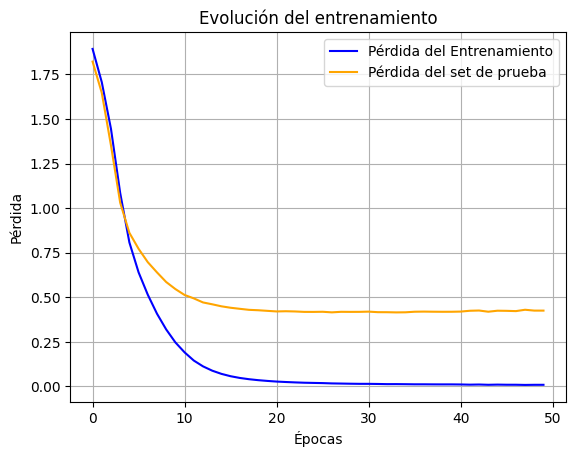

In [24]:
# Gráfico de la función de pérdida (loss)
plt.plot(r.history['loss'], label='Pérdida del Entrenamiento', color='blue')
plt.plot(r.history['val_loss'], label='Pérdida del set de prueba', color='orange')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución del entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

### Gráfico de la presición por iteración

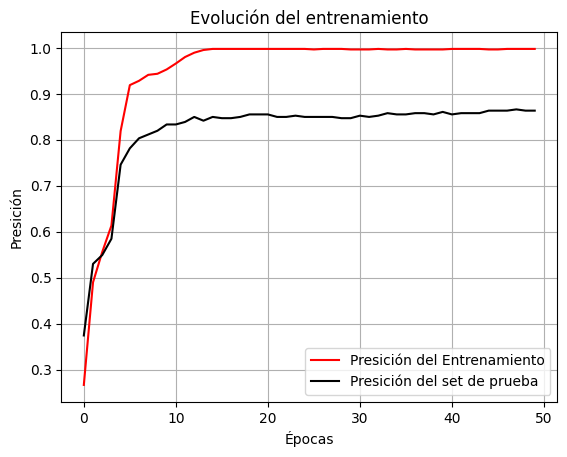

In [25]:
# Gráfico de la métrica de presición (accuracy)
plt.plot(r.history['accuracy'], label='Presición del Entrenamiento', color='red')
plt.plot(r.history['val_accuracy'], label='Presición del set de prueba', color='black')
plt.xlabel('Épocas')
plt.ylabel('Presición')
plt.title('Evolución del entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

## Guardar Modelo y sus Pesos

In [26]:
# Archivo con extensión HDF5 (deprecado) o keras (actual)
modelo.save('modelo21.keras')
print('Modelo guardado con éxito.')

Modelo guardado con éxito.


In [27]:
# Guardamos los pesos
modelo.save_weights('modelo21_pesos.weights.h5')
print('Pesos del modelo guardados con éxito.')

Pesos del modelo guardados con éxito.


In [33]:
# Guardamos el historial del modelo
with open('historial_entrenamiento_21.pkl', 'wb') as f:
    pickle.dump(r.history, f)

In [34]:
# Guardamos el tokenizador
with open('tokenizer_21.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

## Cargar el Modelo para futuras pruebas

In [30]:
model_load = load_model('modelo21.keras', compile=False)

model_load.compile(
    optimizer = RMSprop(),
    loss = SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

print(f'El Modelo {model_load} se ha cargado, y recompilado correctamente.')

El Modelo <Functional name=functional, built=True> se ha cargado, y recompilado correctamente.


## Probamos el Modelo con Datos nuevos

### Función para predecir texto

In [31]:
def predecir_texto(texto, modelo, tokenizer, T, idx2label=None):
    # Asegurarse que el texto está en una lista
    if isinstance(texto, str):
        texto = [texto]

    # Tokenizar y hacer padding
    secuencia = tokenizer.texts_to_sequences(texto)
    secuencia_padded = pad_sequences(secuencia, maxlen=T)

    # Predicción
    pred = modelo.predict(secuencia_padded)
    clase_predicha = np.argmax(pred, axis=1)[0]

    # Mostrar resultado
    if idx2label:
        print(f'Clase predicha: {clase_predicha} ({idx2label[clase_predicha]})')
        return idx2label[clase_predicha]
    else:
        print(f'Clase predicha: {clase_predicha}')
        return clase_predicha

### Llamamos la función

In [32]:
texto_de_prueba = "Este es un ejemplo de noticia económica internacional"
# Crear mapeo inverso de índices a nombres
idx2label = dict(enumerate(df['Type'].astype('category').cat.categories))
predecir_texto(texto_de_prueba, model_load, tokenizer, T)
idx2label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Clase predicha: 2


{0: 'Alianzas',
 1: 'Innovacion',
 2: 'Macroeconomia',
 3: 'Otra',
 4: 'Regulaciones',
 5: 'Reputacion',
 6: 'Sostenibilidad'}

## Conclusiones

<div style="text-align: center;">
    <p>En este modelo, se logró crear una clasificación a través de keras, capaz de indetificar, a partir del contenido de una noticia, cuál es su cateoría. Con un entrenamiento a través de embeddings y redes neuronales convolucionales, hemos generado un clasificador de mayor presición capaz de clasificar cualquier texto informativo.</p>
        <hr/>
    <p style="text-align: right;">Mg. Luis Felipe Bustamante Narváez</p>
</div>